# K近邻法

作者：杨岱川

时间：2019年9月

github：https://github.com/DrDavidS/basic_Machine_Learning

开源协议：[MIT](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/LICENSE)

## K近邻法简介

$k$近邻法（$k$-nearest neighbor, $k$-NN）是一种基本分类与回归方法，于1968年由 Cover 和 Hart 提出。

$k$近邻法的输入为实例的特征向量，输出为实例的类别，可以取多个类。分类时，对于新的实例，根据其 $k$ 个最近邻的训练实例的类别，通过多数表决等方式进行预测。$k$ 值的选择、距离度量及分类决策规则是$k$近邻法的三个基本要素。

## K近邻算法

$k$近邻法的基本做法是：对给定的训练实例点和输入实例点，首先确定输入实例点的$k$个最近邻训练实例点，然后利用这$k$个训练实例点的类的多数来预测输入实例点的类。

### 算法描述

**输入**：训练数据集

$$\large T=\left \{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N) \right \} $$

其中：

$i = 1,2,3,\cdots,N$；

$x_i \in \Bbb X \subseteq \mathbf R^n$ 为实例的特征向量，可以类比 iris 数据集的 features（特征），有多个维度；

$ y_i \in \Bbb Y = \left \{ c_1,c_2,\cdots,c_K \right \}$，可以类比为 iris 数据集的 labels（标签），可以是多分类的。

**输出**：实例 $x$ 所属的类 $y$，相当于是一个预测。

1. 根据给定的距离度量，在训练集 $T$ 中找出与 $x$ 最邻近的 $k$ 个点，涵盖这 $k$ 个点 $x$ 的邻域记作 $N_k(x)$;
2. 在 $N_k(x)$ 中根据分类决策规则（如多数表决）决定 $x$ 的类别 $y$：

$$\large y={\rm argmax}_{c_j}\sum_{x_i\in N_k(x)} I(y_i=c_j) \qquad,i=1,2,\cdots,N;j=1,2,\cdots,K $$

其中 $I$ 为指示函数，当 $y_i=c_j$ 时 $I$ 为1，否则 $I$ 为0。

<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1568785196759&di=dd3320cac77023d413c8e4a8c42b21d2&imgtype=0&src=http%3A%2F%2Fwww.raincent.com%2Fuploadfile%2F2018%2F0329%2F20180329024555293.jpg" width="500" alt="K近邻算法" align=center>

>$k$近邻算法中，当训练集、距离度量、$k$ 值即分类决策规则（如多数表决）确定后，对于任何一个新输入的实例，它所属的类是唯一确定的。

### 距离度量

上面讲了，需要计算**最邻近**的 $k$ 个点，而如何确定点到点之间的距离很重要。

特征空间中的两个实例点的距离是两个实例点相似程度的反映。$k$近邻模型的特征空间一般是 $n$ 维度实数向量空间 $\mathbf R^n$。使用的距离是欧氏距离，但也可以是其他距离，这里我们将介绍 $L_p$ 距离。

设特征空间 $\Bbb X$ 是 $n$ 维实数向量空间 $\mathbf R^n$， $x_i,x_j \in \Bbb X,x_i=(x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)})^{\rm T}$ ，$ x_j=(x_j^{(1)},x_j^{(2)},\cdots,x_j^{(n)})^{\rm T} $，$x_i,x_j$ 的 $L_p$距离定义为：

$$\large L_p(x_i,x_j)=\left( \sum_{l=1}^n \left| x_i^{(l)} - x_j^{(l)} \right |^p \right)^{\frac{1}{p}} $$

其中，$p \ge 1$。

举例说明：类比到iris数据集，我们有：花萼长度、花萼宽度、花瓣长度和花瓣宽度四种特征（不算ID列），则 $ x_i^{(l)}$ 就是第 $i$ 朵鸢尾花实例 $x_i$ 的第 $l$ 个特征（一共四个）

#### $p=1$

当 $p=1$ 时，称为曼哈顿距离（Manhattan distance），公式变为：

$$\large L_1(x_i,x_j)=\sum_{l=1}^n \left| x_i^{(l)} - x_j^{(l)} \right | $$

#### $p=2$

当 $p=2$ 时，成为欧氏距离（Euclidean distance），公式变为：

$$\large L_1(x_i,x_j)=\left( \sum_{l=1}^n \left| x_i^{(l)} - x_j^{(l)} \right |^2 \right)^{\frac{1}{2}} $$

<img src="https://ss3.bdstatic.com/70cFv8Sh_Q1YnxGkpoWK1HF6hhy/it/u=2421422320,3706413579&fm=26&gp=0.jpg" width="400" alt="曼哈顿距离与欧氏距离" align=center>
<center>曼哈顿距离与欧氏距离</center>

如上图，图中绿色线段的长度就是两个黑点的欧氏距离，通俗地说就是直线距离。其余线段则表示曼哈顿距离（出租车路线）。在日常生活中，房地产商的广告总是喜欢宣传“本小区到核心商圈和交通枢纽只需要10分钟车程”，也许“10分钟”是按照欧氏距离，时速120千米计算出来的。

>杭电到西湖边的欧氏距离大概19千米，按行车时速120千米计算真的只要差不多10分钟。

#### $p=\infty$

当 $p=\infty$ 时,称为切比雪夫距离（Chebyshev distance），公式变为：

$$\large L_{\infty}(x_i,x_j)=\max_l \left| x_i^{(l)} - x_j^{(l)} \right |^p $$

切比雪夫距离有在国际象棋上有一种有趣的应用：若将国际象棋棋盘放在二维直角座标系中，格子的边长定义为1，座标的x轴及y轴和棋盘方格平行，原点恰落在某一格的中心点，则王从一个位置走到其他位置需要的步数恰为二个位置的切比雪夫距离，因此切比雪夫距离也称为棋盘距离。

<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1568784980000&di=4d60ccbc769c2cc8ebb158f8ba1bd64f&imgtype=0&src=http%3A%2F%2Fa4.att.hudong.com%2F48%2F22%2F01300000009075133329227359321_s.jpg" width="400" alt="曼哈顿距离与欧氏距离" align=center>


见扩展阅读：[切比雪夫距离](https://zh.wikipedia.org/wiki/切比雪夫距离)

### $k$ 值的选择

$k$ 值的选择会对$k$近邻法的结果产生重大影响。

具体地：

**$k$ 值的减小意味着整体模型变得复杂，容易发生过拟合。**

$k$ 值较小意味着预测结果对临近的实例点更加敏感，如果临近实例点恰巧是噪声，预测很可能会出错。

**$k$ 值的增大意味着整体模型变得简单。**

$k$ 值较大意味着与待遇测实例较远（不相似）的训练实例也会对预测起作用，使预测发生错误。

> 特别地：
>
>当 $k=N$ 时，相当于取所有点的label投票，无论输入实例是什么，都将简单地预测它在训练实例中最多的类。属于模型最简单的那种情况。

## SKlearn中的$k$近邻算法

在SKlearn中，也有现成的$k$近邻法（分类）供我们调用。

参考：
- [Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)。
- [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- [《统计学习方法》的代码实现](https://github.com/fengdu78/lihang-code)

### 数据准备

之前我们都是从 iris.csv 导入数据集，实际上SKlearn也有很多内置数据集，包括 iris 数据集。这次我们使用 SKlearn 自带的 iris 数据集。

In [12]:
import matplotlib.pyplot as plt  # 绘图
import numpy as np  # numpy
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# 导入iris数据集，转换为 dataframe 格式
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [2]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


接下来绘制出数据的分布。在这里我们实际使用的是四维数据，但是只绘制出其中两个维度，即花萼长度和花萼宽度。

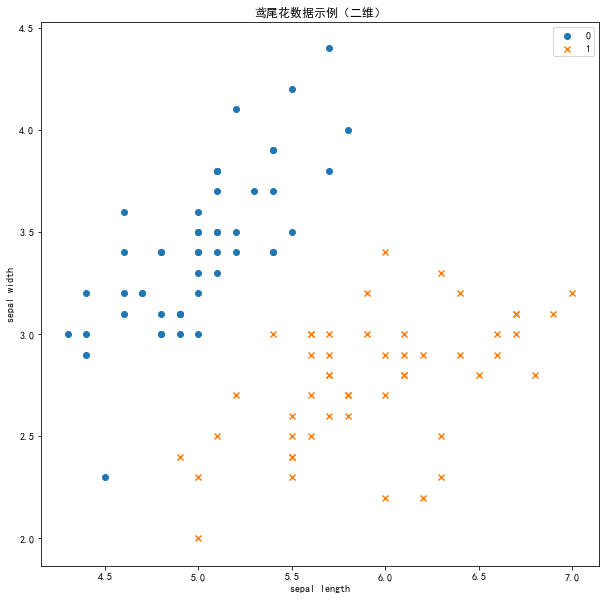

In [13]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花数据示例（二维）')

# 点的绘制
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1', marker='x')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

筛选具有线性可分特征的两类鸢尾花：

In [14]:
# 筛选两类鸢尾花
data = np.array(df.iloc[:100, [0, 1, -1]])

# 拆分为 features 和 labels
X, y = data[:,:-1], data[:,-1]

# 随机划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 二八划分

### 模型训练

In [15]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

clf 自动输出了相关参数，解释其中重要的几个：

- algorithm='auto'：指的是算法使用的具体实现，《统计学习方法》书中的 **kd树** 也被内置在其中，我们可以使用algorithm='kd_tree'调用，此外还有 BallTree 等算法。扩展阅读[Ball tree](https://en.wikipedia.org/wiki/Ball_tree)
- n_jobs：决定我们使用多少进程来执行这个算法。
- n_neighbors=5：相当于之前讲的 $k$ 的取值。
- metric='minkowski'：度量方式采用闵可夫斯基距离公式，相当于前文的 $L_p$ 距离。
- p=2：闵可夫斯基距离公式中，当 $p=2$ 时，变为欧几里得距离公式。

其余参数的含义见[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)中，**Parameters** 条目。

### 模型预测

接下来看看对测试数据集的结果，以及在测试数据集上的准确率（mean accuracy）：

In [16]:
y_predict = clf.predict(X_test)
y_predict

array([ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.])

In [17]:
y_test

array([ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.])

In [18]:
clf.score(X_test, y_test)

1.0

### 可视化展示

单独设置一个点，展示一下模型的判断能力。

假设测试点数据如下：

In [19]:
test_point = [[6.0, 3.0]]  # 注意这里是一个二维列表
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: [ 1.]


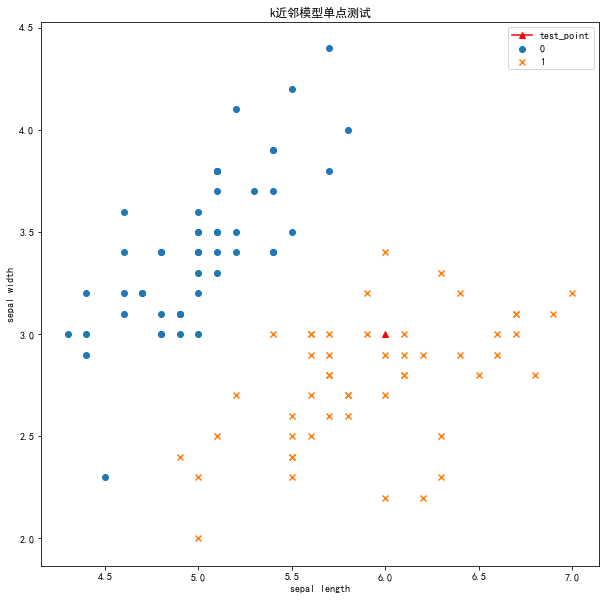

In [20]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('k近邻模型单点测试')

# 点的绘制
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1', marker='x')
plt.plot(test_point[0][0], test_point[0][1],  c='r', marker='^', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()